In [2]:
#  Neural network classification with pytorch

import torch
from torch import nn
import sklearn
from sklearn.datasets import make_circles

#  make 1000 samples

n_samples = 1000
X,Y = make_circles(n_samples , noise=0.03 , random_state=42 ) 

len(X) , len(Y)

print(X[:10])
print(Y[:10])




[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]]
[1 1 1 1 0 1 1 1 1 0]


In [3]:
#  make dataframe of circle data

import pandas as pd
circles = pd.DataFrame({"X1": X[:,0] , "X2" : X[:,1], "label" : Y })

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


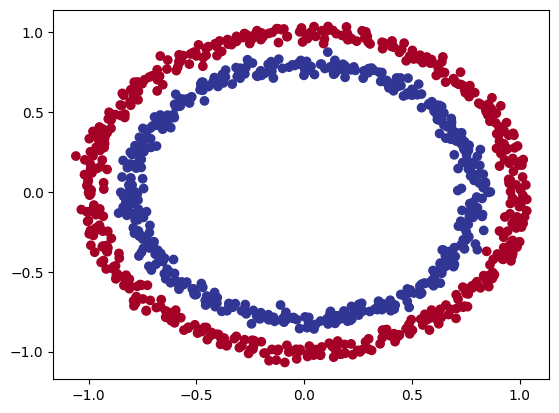

In [11]:
#  Visualize these numbers
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0] , y=X[:,1], c=Y , cmap=plt.cm.RdYlBu)

In [4]:
X.shape , Y.shape
X.dtype , Y.dtype

(dtype('float64'), dtype('int64'))

In [19]:
# turn data into tensors and create train and test splits
X[:5] , 
Y[:5]

X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)
# Y[:5]

TypeError: expected np.ndarray (got Tensor)

In [5]:
X[:5],Y[:5]

print(X.dtype , Y.dtype)

float64 int64


In [18]:
#  split data into training and test sets
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X, Y , test_size=0.2 , random_state=42 )

len(X_train) , len(X_test) , len(Y_train) , len(Y_test)

print(X_train.shape)


torch.Size([800, 2])


In [17]:
#  Builing a model 
#  to classify our blue and red dots

#  setup a device agonistic
device = "cuda" if torch.cuda.is_available() else "cpu"

device

#  construct a model
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # create 2 nn.linear layer capable of handling the shape of our data
        self.layer_1 = nn.Linear(in_features=2 , out_features=5)
        self.layer_2 = nn.Linear(in_features=5 , out_features=1)



    def forward(self ,x) :
        return self.layer_2(self.layer_1(x))
    
#  instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0    


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [8]:
#  Let's replicate the model using nn.sequnetials()

model_1 = nn.Sequential(
    nn.Linear(in_features=2 , out_features=5),
    nn.Linear(in_features=5 , out_features=1)
    
).to(device)


print( model_0 ,model_1)

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
) Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)


In [9]:
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5681, -0.4758],
                      [ 0.6325, -0.3524],
                      [-0.1208,  0.6900],
                      [-0.5393,  0.1632],
                      [ 0.3825,  0.6957]])),
             ('0.bias', tensor([ 0.7017,  0.3012,  0.0863,  0.5563, -0.3588])),
             ('1.weight',
              tensor([[ 0.2612, -0.3697,  0.1112,  0.2858,  0.0726]])),
             ('1.bias', tensor([0.1078]))])

In [20]:
#  make preds 
with torch.inference_mode():
    untrained_preds = model_1(X_test.to(device))
print(f"Lenght of pred : {len(untrained_preds)} , shape : {untrained_preds.shape} ")
print(f"lenght of test samples : {len(X_test)} , shape{X_test.shape}")
print(f"\n first 10 prediction : \n {untrained_preds[:10]}")
print (f"first 10 labels: {Y_test[:10]}")

Lenght of pred : 200 , shape : torch.Size([200, 1]) 
lenght of test samples : 200 , shapetorch.Size([200, 2])

 first 10 prediction : 
 tensor([[0.5295],
        [0.4914],
        [0.4239],
        [0.5602],
        [0.0978],
        [0.0771],
        [0.2283],
        [0.1304],
        [0.4378],
        [0.4852]])
first 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [21]:
#  Setup loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()

#  optimizer
optimizer = torch.optim.SGD(params=model_1.parameters() , lr=0.1)

In [22]:
#  calculate the accuracy - out of 100 what % our model get right

def accuracy_fn(Y_True , Y_Pred):
    correct = torch.eq(Y_True , Y_Pred).sum().item()
    acc = (correct/len(Y_Pred)) * 100
    return acc

Train model 
# Forward pass
# calculate the loss
# optimize Zero gradient
# loss backward (backpropagation)
# Optimizer step (gradient descent)



In [23]:
#  view the first 5 output of forward pass on the test data
model_1.eval()
with torch.inference_mode():
    Y_logits = model_1(X_test.to(device))[:5]
Y_logits , Y_test[:5]

(tensor([[0.5295],
         [0.4914],
         [0.4239],
         [0.5602],
         [0.0978]]),
 tensor([1., 0., 1., 0., 1.]))

In [24]:
#  use the sigmoid activation function on our model function
Y_pred_probs  = torch.sigmoid(Y_logits)

Y_pred_probs

Y_preds =  torch.round(Y_pred_probs)

Y_preds.squeeze()[:5]


tensor([1., 1., 1., 1., 1.])

In [25]:
#  Building the training steps
torch.manual_seed(42)

epochs = 100

X_train , Y_train  = X_train.to(device) , Y_train.to(device)
X_test , Y_test = X_test.to(device) , Y_test.to(device)

for epoch in range(epochs):
    # training
    model_1.train()

    #  forward pass
    Y_logits = model_1(X_train).squeeze()
    Y_Preds = torch.round(torch.sigmoid(Y_logits))

    # print(Y_Preds.shape , Y_train.shape) 


    #  calculate the loss / accuracy
    loss = loss_fn(Y_logits , Y_train)
    acc = accuracy_fn(Y_True=Y_train , Y_Pred=Y_Preds)

    #  optimzer zero grad
    optimizer.zero_grad()

    #  loss backward
    loss.backward()

    #  optimizer step 
    optimizer.step()

    #  testing 
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        #  calculate the test loss
        test_loss = loss_fn(test_logits , Y_test)
        test_acc = accuracy_fn(Y_True=Y_test , Y_Pred=test_pred)

        # print out what's happening

        if epoch % 10 == 0 :
            print(f"Epoch : {epoch} | loss : {loss} | acc : {acc:.2f} | testloss : {test_loss} | test acc : {test_acc} ")
   

Epoch : 0 | loss : 0.7096489667892456 | acc : 50.00 | testloss : 0.7107496857643127 | test acc : 50.0 
Epoch : 10 | loss : 0.7006621360778809 | acc : 55.50 | testloss : 0.7027959227561951 | test acc : 55.00000000000001 
Epoch : 20 | loss : 0.6972346305847168 | acc : 52.00 | testloss : 0.6996229290962219 | test acc : 51.5 
Epoch : 30 | loss : 0.6956480145454407 | acc : 51.50 | testloss : 0.6980536580085754 | test acc : 52.5 
Epoch : 40 | loss : 0.6947715878486633 | acc : 51.00 | testloss : 0.6971179246902466 | test acc : 52.0 
Epoch : 50 | loss : 0.6942242980003357 | acc : 51.12 | testloss : 0.6964882016181946 | test acc : 51.0 
Epoch : 60 | loss : 0.6938582062721252 | acc : 50.75 | testloss : 0.6960363984107971 | test acc : 50.0 
Epoch : 70 | loss : 0.6936047077178955 | acc : 51.12 | testloss : 0.6957021951675415 | test acc : 49.0 
Epoch : 80 | loss : 0.6934261322021484 | acc : 51.12 | testloss : 0.6954512000083923 | test acc : 49.0 
Epoch : 90 | loss : 0.6932994723320007 | acc : 50.75

from the metrics it looks like our model isn't learning anything
lets inspect it , let's make some prediction

helper function.py

https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [36]:
import requests
from pathlib import Path

#  download helper function from learn pytorch repo

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exist, skipping download")
else :
    print("download helper_function.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py" , "wb" ) as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary 

helper_functions.py already exist, skipping download


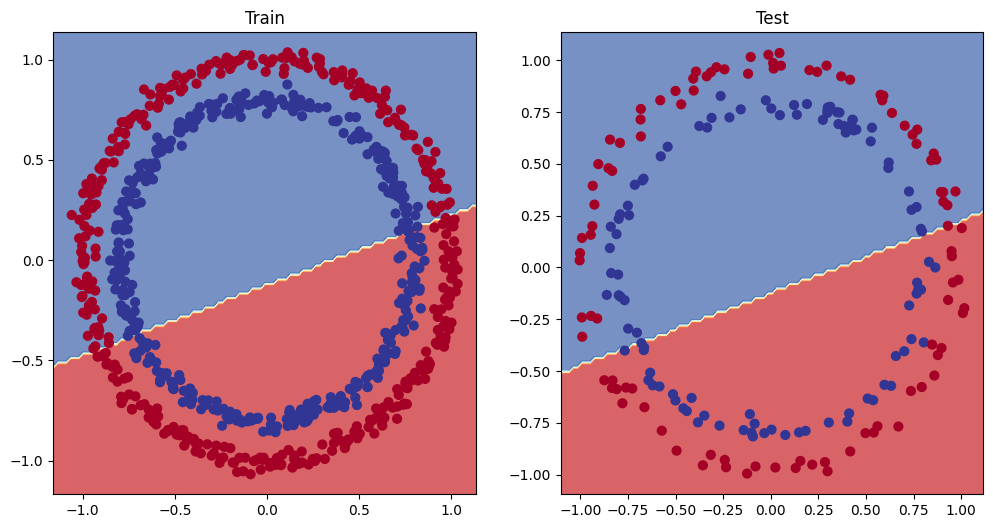

In [39]:
#  plot decision boundary of the model
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1 , X_train , Y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1 , X_test , Y_test)


#  Improving our model (from a model perspetive)re 

* add more layers 
* add more hidden units
* fir for longer
* changing the activation functions
* change the learning rate
* change the loss function



In [130]:
#  Improving our model (from a model perspetive)
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2 , out_features=10)
        self.layer_2 = nn.Linear(in_features=10 , out_features=10)
        self.layer_3 = nn.Linear(in_features=10 , out_features=1)

    def forward(self , x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x)))
    

model_2 = CircleModelV1().to(device)
model_2






CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [42]:
#  create a loss function 
loss_fn = nn.BCEWithLogitsLoss()


#  create an optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [54]:
#  write a training and evaluation loop for model_2

torch.manual_seed(42)

X_train , Y_train  = X_train.to(device) , Y_train.to(device)
X_test , Y_test = X_test.to(device) , Y_test.to(device)

epochs = 1000

for epoch in range(epochs):
    # Training
    # print("sadasd")
    model_2.train()

    #  forward pass
    Y_logits = model_2(X_train).squeeze()
    Y_Preds = torch.round(torch.sigmoid(Y_logits))

    #  calculate the loss/accuracy
    loss = loss_fn(Y_logits , Y_train)
    acc = accuracy_fn(Y_True=Y_train , Y_Pred=Y_Preds)

    # optimizer zero grad
    optimizer.zero_grad()

    #  back propogation
    loss.backward()

    # optimiser step
    optimizer.step()

    #  testing

    model_2.eval()
    with torch.inference_mode():
        # forward pass
        test_logits = model_2(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # calculate the loss
        test_loss = loss_fn(test_logits , Y_test)
        test_acc = accuracy_fn(Y_True=Y_test , Y_Pred=test_pred)


#  print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch : {epoch} | Loss : {loss } , acc: {acc} | Test loss : {test_loss}, Test acc:{test_acc} ")




Epoch : 0 | Loss : 0.6929798126220703 , acc: 51.0 | Test loss : 0.6946794986724854, Test acc:46.0 
Epoch : 100 | Loss : 0.6929798126220703 , acc: 51.0 | Test loss : 0.6946794986724854, Test acc:46.0 
Epoch : 200 | Loss : 0.6929798126220703 , acc: 51.0 | Test loss : 0.6946794986724854, Test acc:46.0 
Epoch : 300 | Loss : 0.6929798126220703 , acc: 51.0 | Test loss : 0.6946794986724854, Test acc:46.0 
Epoch : 400 | Loss : 0.6929798126220703 , acc: 51.0 | Test loss : 0.6946794986724854, Test acc:46.0 
Epoch : 500 | Loss : 0.6929798126220703 , acc: 51.0 | Test loss : 0.6946794986724854, Test acc:46.0 
Epoch : 600 | Loss : 0.6929798126220703 , acc: 51.0 | Test loss : 0.6946794986724854, Test acc:46.0 
Epoch : 700 | Loss : 0.6929798126220703 , acc: 51.0 | Test loss : 0.6946794986724854, Test acc:46.0 
Epoch : 800 | Loss : 0.6929798126220703 , acc: 51.0 | Test loss : 0.6946794986724854, Test acc:46.0 
Epoch : 900 | Loss : 0.6929798126220703 , acc: 51.0 | Test loss : 0.6946794986724854, Test ac

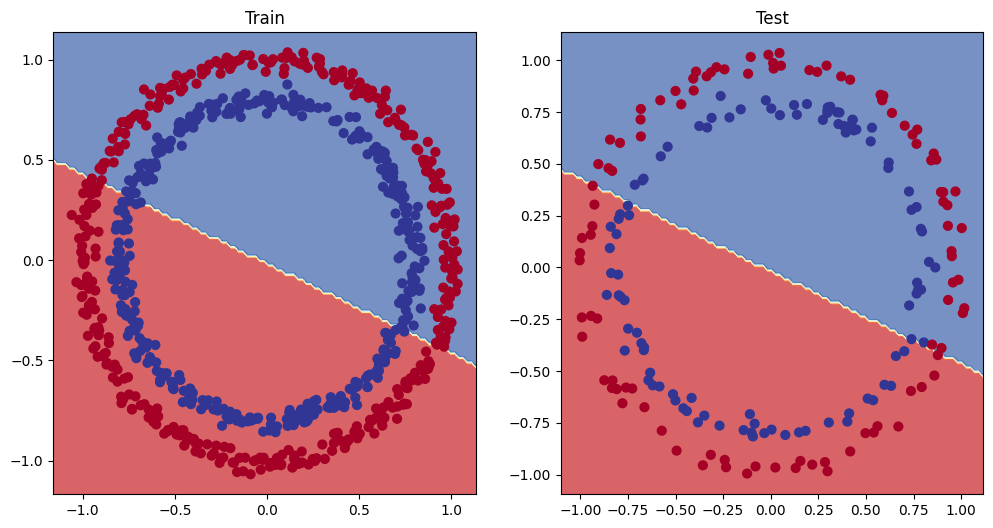

In [55]:
#  plot the decision bountry

#  plot decision boundary of the model
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2 , X_train , Y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2 , X_test , Y_test)

preparing data to see if our model can fit a straight line

100
80 20


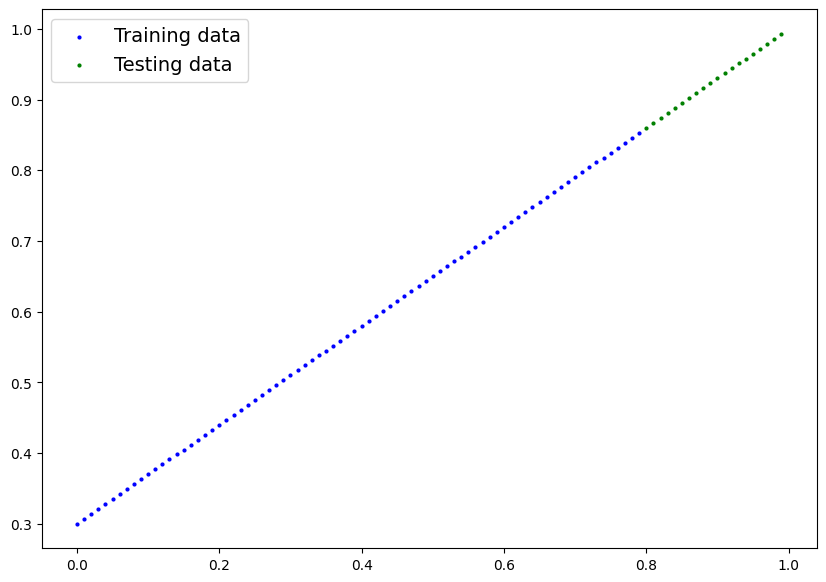

In [87]:
#  create some data

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

#  create data
X_regression = torch.arange(start , end , step).unsqueeze(dim=1)
Y_Regression = weight * X_regression + bias

#  check the data
print(len(X_regression))
X_regression[:5] , Y_Regression[:5]


#  create train and test split 
train_split = int(0.8 * len(X_regression))
X_train_reg , Y_train_reg  =X_regression[:train_split] , Y_Regression[:train_split]
X_test_reg , Y_test_reg = X_regression[train_split:] , Y_Regression[train_split:]

plot_predictions(train_data=X_train_reg , train_labels=Y_train_reg , test_data=X_test_reg , test_labels=Y_test_reg )


print(len(X_train_reg) , len(Y_test_reg) )







In [89]:
model_2

#  adjusting model_2 to fit a straight line
model_3 = nn.Sequential(
    nn.Linear(in_features=1 , out_features=10),
    nn.Linear(in_features=10 , out_features=10),
    nn.Linear(in_features=10 , out_features=1),

)

model_3

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [97]:
#  loss and optimizer

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_3.parameters() , lr=0.01)




In [100]:
#  train the model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# X_train_reg , Y_train_reg = X_train_reg.to(device) , Y_train_reg.to(device)
# X_test_reg , Y_test_reg = X_test_reg.to(device) , Y_test_reg.to(device)

for epoch in range(epochs):
    y_preds = model_3(X_train_reg)

    loss = loss_fn(y_preds , Y_train_reg)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # testing
    model_3.eval()
    with torch.inference_mode():
        test_pred = model_3(X_test_reg)
        test_loss = loss_fn(test_pred , Y_test_reg)

    if epoch % 100 == 0 :
        print(f"Epoch : {epoch} | loss : {loss} | test loss : {test_loss} ")







Epoch : 0 | loss : 0.006154084578156471 | test loss : 0.0020019859075546265 
Epoch : 100 | loss : 0.006179900374263525 | test loss : 0.0017558485269546509 
Epoch : 200 | loss : 0.006183570250868797 | test loss : 0.0016625672578811646 
Epoch : 300 | loss : 0.00608906289562583 | test loss : 0.0018638580804690719 
Epoch : 400 | loss : 0.006535339169204235 | test loss : 0.0005722522619180381 
Epoch : 500 | loss : 0.007854657247662544 | test loss : 0.0004896789905615151 
Epoch : 600 | loss : 0.005865628365427256 | test loss : 0.0008841902017593384 
Epoch : 700 | loss : 0.0056791771203279495 | test loss : 0.0008326202514581382 
Epoch : 800 | loss : 0.0057968865148723125 | test loss : 0.0011956930393353105 
Epoch : 900 | loss : 0.005920263938605785 | test loss : 0.0011511743068695068 


In [103]:
#  turn on eval mode

model_3.eval()
with torch.inference_mode():
    y_preds = model_3(X_test_reg)

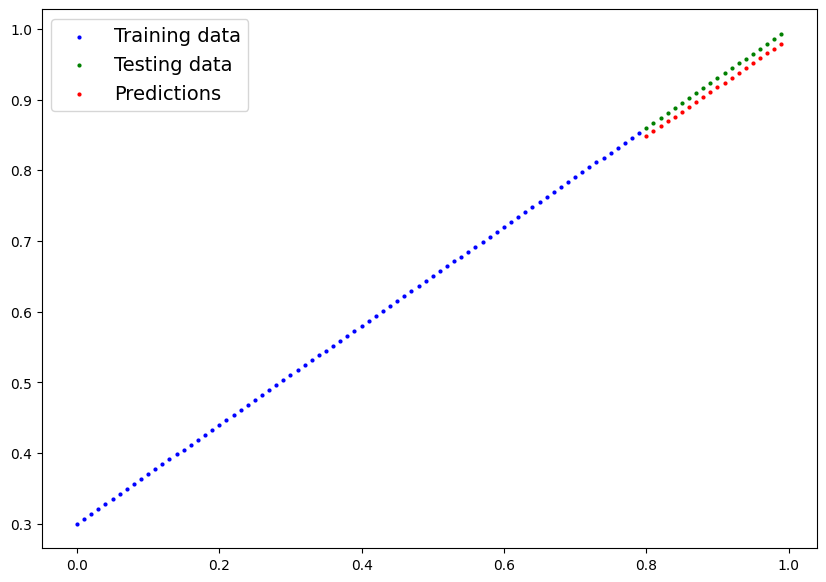

In [104]:
plot_predictions(train_data=X_train_reg , train_labels=Y_train_reg , test_data=X_test_reg , test_labels=Y_test_reg , predictions= test_pred )

Non linearity ( missing piece of code) 

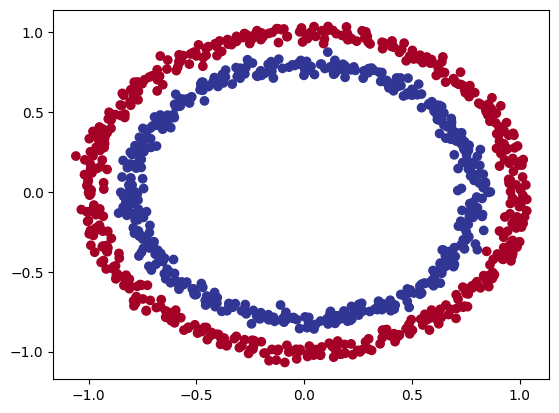

In [108]:
#  recreating non linear data (red and blue circles)
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, Y = make_circles(n_samples , noise=0.03 , random_state=42 )

plt.scatter(X[: ,0] , X[: ,1], c=Y  , cmap=plt.cm.RdYlBu )




In [138]:
#  convert data to tensor and train and test split

import torch 
from sklearn.model_selection import train_test_split

#  trun data into tensor
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)

#  split test and train
X_train , X_test , Y_train , Y_test =  train_test_split( X, Y , test_size=0.2 , random_state=42 )

X_train[:10] , Y_train[:10]





TypeError: expected np.ndarray (got Tensor)

In [136]:
#  building a model with non linearity 
from torch import nn

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2 , out_features=10)
        self.layer_2 = nn.Linear(in_features=10 , out_features=10)
        self.Layer_3 = nn.Linear(in_features=10, out_features=1 )
        self.relu = nn.ReLU()

    def forward(self , x):
            # where should we put our non-linear activation function
        return self.Layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
        
model_4 = CircleModelV2()
model_4

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (Layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [137]:
#  setup loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_4.parameters() , lr=0.1 )

#  training model with non linearity

In [147]:
torch.manual_seed(42)

#  put all data on target device

#  loop through data

epochs = 1000

for epoch in range(epochs):
    # training
    model_4.train()

    #  forward pass
    Y_logits = model_4(X_train).squeeze()
    Y_pred = torch.round(torch.sigmoid(Y_logits))

    #  calculate the loss
    loss = loss_fn(Y_logits , Y_train)
    acc =  accuracy_fn(Y_True=Y_train , Y_Pred=Y_pred  )

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    #  testing

    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits , Y_test)
        test_acc = accuracy_fn(Y_True= Y_test , Y_Pred= test_pred )

    #  print the epoch
    if epoch % 100 == 0:
        print(f"Epoch : {epoch} | loss : {loss: .4f} , acc : {acc : .2f} | test loss : {test_loss : .4f} | test acc : {test_acc :.2f}  ")








Epoch : 0 | loss :  0.0048 , acc :  100.00 | test loss :  0.0143 | test acc : 100.00  
Epoch : 100 | loss :  0.0047 , acc :  100.00 | test loss :  0.0141 | test acc : 100.00  
Epoch : 200 | loss :  0.0046 , acc :  100.00 | test loss :  0.0139 | test acc : 100.00  
Epoch : 300 | loss :  0.0045 , acc :  100.00 | test loss :  0.0137 | test acc : 100.00  
Epoch : 400 | loss :  0.0044 , acc :  100.00 | test loss :  0.0135 | test acc : 100.00  
Epoch : 500 | loss :  0.0043 , acc :  100.00 | test loss :  0.0133 | test acc : 100.00  
Epoch : 600 | loss :  0.0042 , acc :  100.00 | test loss :  0.0131 | test acc : 100.00  
Epoch : 700 | loss :  0.0041 , acc :  100.00 | test loss :  0.0130 | test acc : 100.00  
Epoch : 800 | loss :  0.0040 , acc :  100.00 | test loss :  0.0128 | test acc : 100.00  
Epoch : 900 | loss :  0.0039 , acc :  100.00 | test loss :  0.0126 | test acc : 100.00  


In [142]:
#  evaluating the model with non linear activation functions

model_4.eval()
with torch.inference_mode():
    y_pred = torch.round(torch.sigmoid(model_4(X_test))).squeeze()

y_pred[:10] , Y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

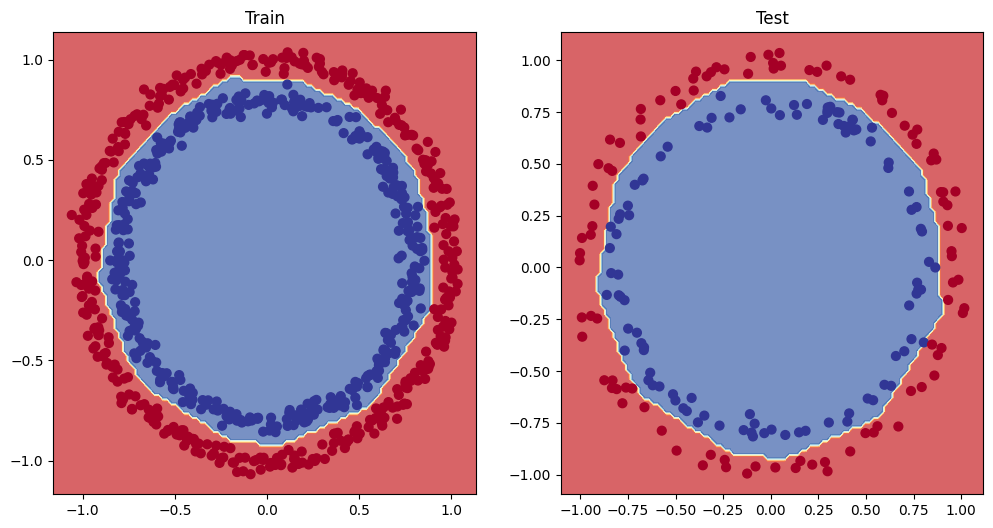

In [148]:
#  plot the decision bountry

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4 , X_train , Y_train )
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4 , X_test , Y_test )

Neuron network , rather than us telling the model what to learn 

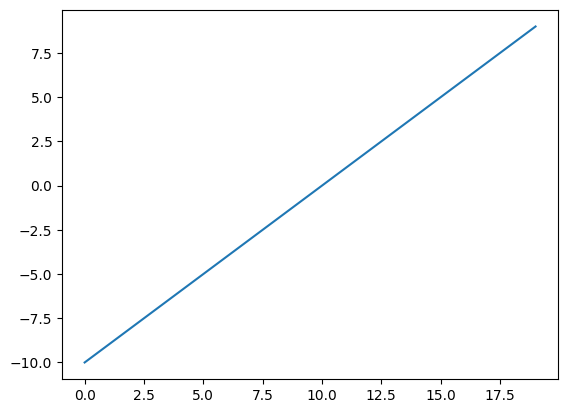

In [152]:
#  replicating non linear activation function
#  create a tensor to start with

A = torch.arange(-10, 10, 1 , dtype=torch.float32)
A.dtype

plt.plot(A)

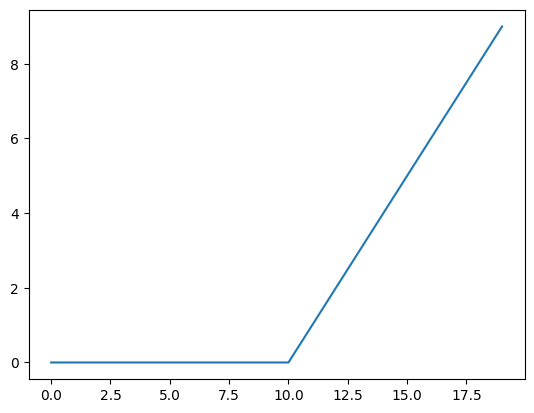

In [154]:
plt.plot(torch.relu(A))

In [155]:
#  lets do same for sigmoid

def sigmoid(x):
    return 1/(1 + torch.exp(-x))

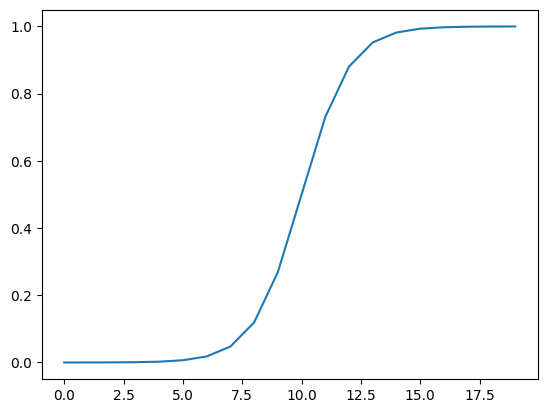

In [156]:
plt.plot(torch.sigmoid(A))

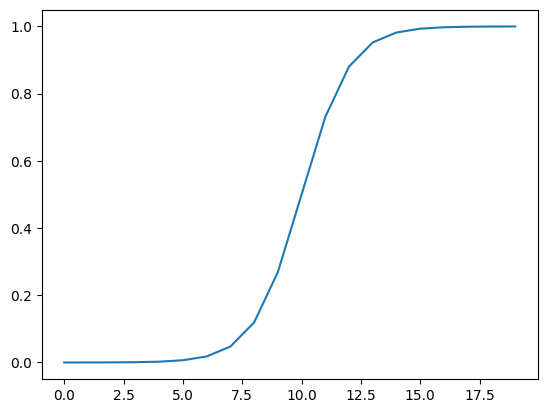

In [157]:
plt.plot(sigmoid(A))